In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats
from scipy.integrate import quad
from tqdm import tqdm
from sklearn.mixture import GaussianMixture
from astropy.visualization.hist import hist as fancyhist
from sklearn.neighbors import KernelDensity

In [2]:
spin = np.random.uniform(0, 1, 10000)
mass = np.random.normal(1, 0.02, 10000)
Mirr = mass * ((1 + (1-spin**2)**0.5)/2)**0.5

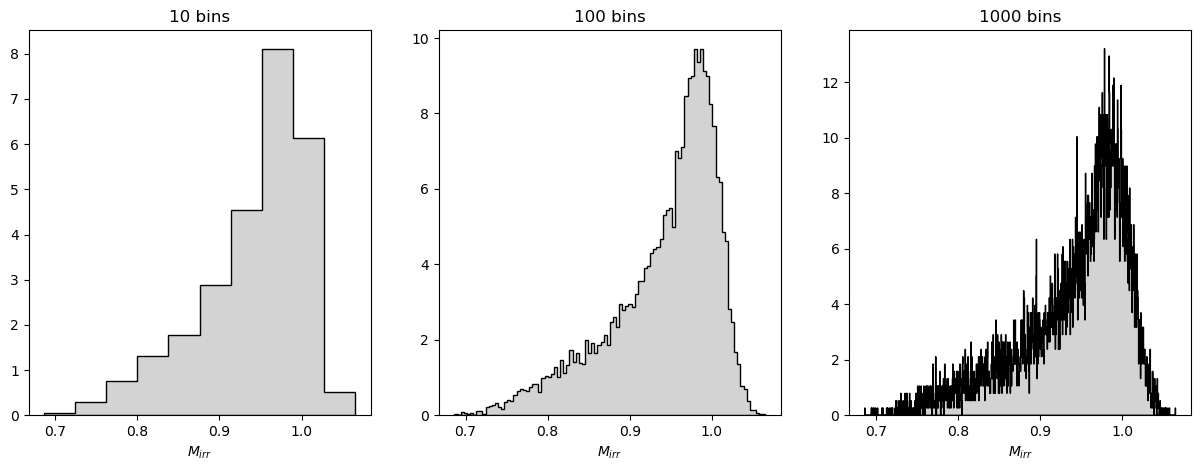

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(Mirr, bins = 10, density = True, ec='black', fc='lightgrey', histtype='stepfilled')
axs[0].set_xlabel(r'$M_{irr}$')
#axs[0].set_ylabel(r'N($M_{irr}$)')
axs[0].set_title('10 bins')

axs[1].hist(Mirr, bins = 100, density = True, ec='black', fc='lightgrey', histtype='stepfilled')
axs[1].set_xlabel(r'$M_{irr}$')
#axs[1].set_ylabel(r'N($M_{irr}$)')
axs[1].set_title('100 bins')

axs[2].hist(Mirr, bins = 1000, density = True, ec='black', fc='lightgrey', histtype='stepfilled')
axs[2].set_xlabel(r'$M_{irr}$')
#axs[2].set_ylabel(r'N($M_{irr}$)')
axs[2].set_title('1000 bins')

plt.show()

## Scott & Freedman

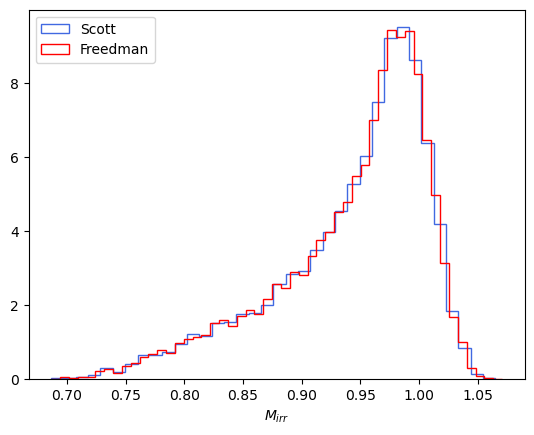

In [4]:
hist_scott = fancyhist(Mirr, bins="scott", histtype="step", density=True, ec = 'royalblue', label = 'Scott')
hist_freedman = fancyhist(Mirr, bins="freedman", histtype="step", density=True, ec = 'red', label = 'Freedman')
#plt.plot(Mirr[:1000], 0*Mirr[:1000], '|', color='k', markersize=25)
#plt.plot(Mirr, 0*Mirr, '|', color='k', markersize=25)
plt.xlabel(r'$M_{irr}$')
plt.legend(loc='upper left')
plt.show()

## KDE

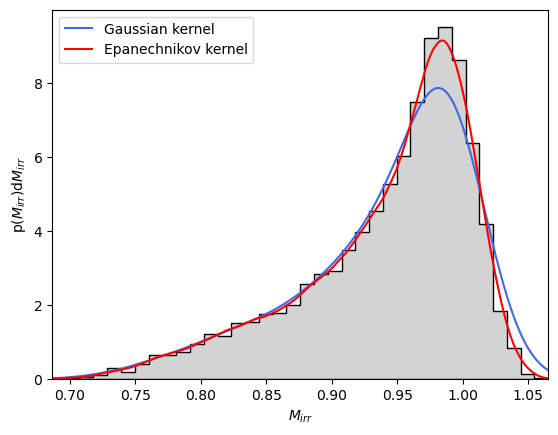

In [5]:
xgrid = np.linspace(Mirr.min(), Mirr.max(), 10000) 

def kde_sklearn(data, bandwidth = 1.0, kernel = "linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, kernel = kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis])
    return np.exp(log_pdf)
    
PDF_gaussian_Mirr = kde_sklearn(Mirr, bandwidth = 0.02, kernel="gaussian")
plt.plot(xgrid, PDF_gaussian_Mirr, color = 'royalblue', label = 'Gaussian kernel') 

PDF_epanechnikov_Mirr = kde_sklearn(Mirr, bandwidth = 0.02, kernel="epanechnikov") 
plt.plot(xgrid, PDF_epanechnikov_Mirr, color = 'red', label = 'Epanechnikov kernel') 

hist_scott = fancyhist(Mirr, bins = "scott", density = True, ec='black', fc='lightgrey', histtype='stepfilled')

plt.xlim(Mirr.min(), Mirr.max())
plt.xlabel(r'$M_{irr}$')
plt.ylabel(r'p($M_{irr}$)d$M_{irr}$')
plt.legend(loc='upper left')
plt.show()

## Distribution of f

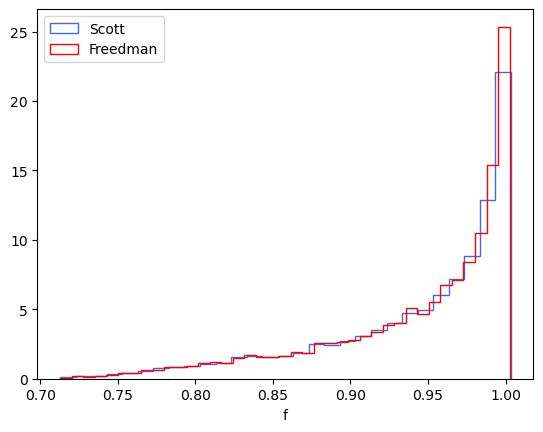

In [6]:
f = Mirr/mass
hist_scott = fancyhist(f, bins="scott", histtype="step", density=True, ec = 'royalblue', label = 'Scott')
hist_freedman = fancyhist(f, bins="freedman", histtype="step", density=True, ec = 'red', label = 'Freedman')
plt.xlabel('f')
plt.legend(loc='upper left')
plt.show()

## Comparison with the theoretical PDF

100%|██████████| 10000/10000 [00:11<00:00, 903.12it/s]


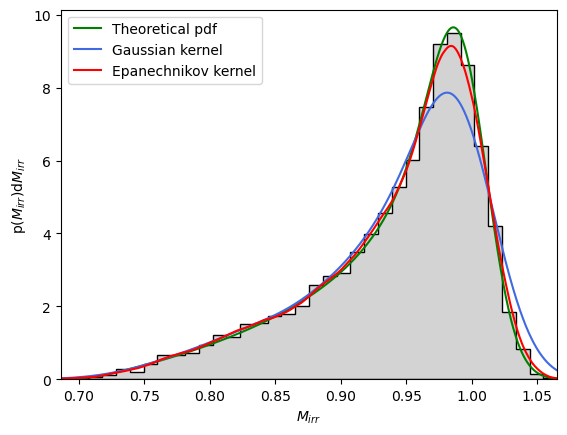

In [7]:
def pdf_Mirr(mirr, sigma, mean):
    integral = scipy.integrate.quad(lambda ef: np.exp(- (mirr/ef-mean)**2/(2*sigma**2))*(2*ef**2-1)/(ef*np.sqrt(1-ef**2)), 1/np.sqrt(2), 1)[0]
    return (np.sqrt(2/np.pi)/sigma)*integral

p_Mirr = [pdf_Mirr(xi, 0.02, 1) for xi in tqdm(xgrid)]

plt.plot(xgrid, p_Mirr, color = 'green', label = 'Theoretical pdf')
plt.plot(xgrid, PDF_gaussian_Mirr, color = 'royalblue', label = 'Gaussian kernel') 
plt.plot(xgrid, PDF_epanechnikov_Mirr, color = 'red', label = 'Epanechnikov kernel') 
hist_scott = fancyhist(Mirr, bins = "scott", density = True, ec='black', fc='lightgrey', histtype='stepfilled')
plt.xlim(Mirr.min(), Mirr.max())
plt.xlabel(r'$M_{irr}$')
plt.ylabel(r'p($M_{irr}$)d$M_{irr}$')
plt.legend(loc='upper left')
plt.show()

## NON SO SE HA SENSO

100%|██████████| 10000/10000 [00:00<00:00, 639161.26it/s]


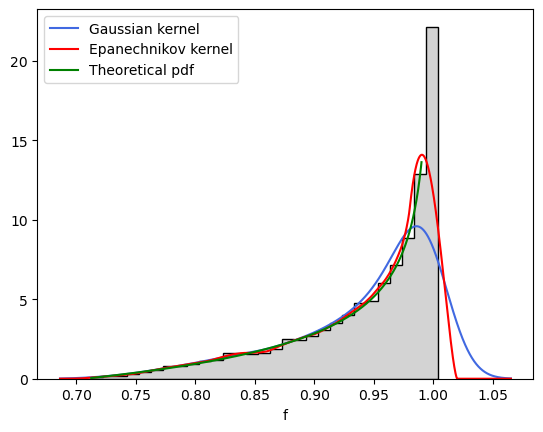

In [8]:
def pdf_f(x):
    return 2*((2*x**2-1)/(1-x**2)**0.5)

f_lin = np.linspace(min(f), 0.99, 10000)
p_f = [pdf_f(x) for x in tqdm(f_lin)] 

PDF_gaussian_f = kde_sklearn(f, bandwidth = 0.02, kernel="gaussian")
plt.plot(xgrid, PDF_gaussian_f, color = 'royalblue', label = 'Gaussian kernel') 

PDF_epanechnikov_f = kde_sklearn(f, bandwidth = 0.02, kernel="epanechnikov") 
plt.plot(xgrid, PDF_epanechnikov_f, color = 'red', label = 'Epanechnikov kernel') 

hist_scott = fancyhist(f, bins="scott", density=True, ec='black', fc='lightgrey', histtype='stepfilled')
plt.plot(f_lin, p_f, color = 'green', label = 'Theoretical pdf')
plt.xlabel('f')
plt.legend(loc='upper left')
plt.show()

## KS test (capisci se è giusto sigma/mu)

In [62]:
mu = 1
sigma = np.logspace(-4, 4, 100)
ks_f = np.zeros(len(sigma))
ks_M = np.zeros(len(sigma))
for i in tqdm(range(len(sigma))):
    spin = np.random.uniform(0, 1, 10000)
    M = (np.random.normal(mu, sigma[i], 10000))/mu
    M_irr = (M * ((1 + (1-spin**2)**0.5)/2)**0.5)/mu
    ff = M_irr/M
    ks_f[i] = scipy.stats.kstest(M_irr, ff).statistic
    ks_M[i] = scipy.stats.kstest(M_irr, M).statistic

100%|██████████| 100/100 [00:01<00:00, 84.27it/s]


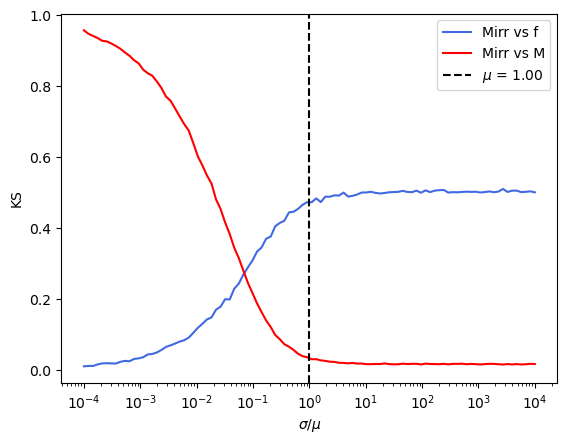

In [63]:
plt.plot(sigma/mu, ks_f, color = 'royalblue', label = 'Mirr vs f')
plt.plot(sigma/mu, ks_M, color = 'red', label = 'Mirr vs M')
plt.semilogx()
plt.axvline(mu, color = 'black', ls = '--', label = r'$\mu$ = %0.2f' %(mu))
plt.xlabel('$\sigma$/$\mu$')
plt.ylabel('KS')
plt.legend()
plt.show()

## CDF CAPISCI COME SI CALCOLA E SE VUOI METTERLO

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


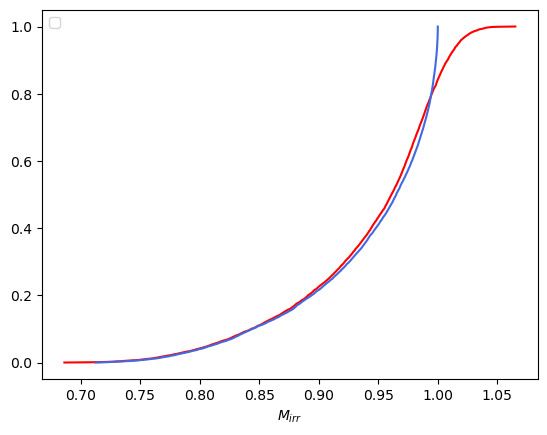

In [56]:
cdf_Mirr = np.arange(1, len(Mirr)+1)/len(Mirr)
cdf_f = np.arange(1, len(f)+1)/len(f)


plt.plot(np.sort(Mirr), cdf_Mirr, color = 'red')
plt.plot(np.sort(f), cdf_f, color = 'royalblue')

plt.xlabel(r'$M_{irr}$')
plt.legend(loc='upper left')
plt.show()